In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

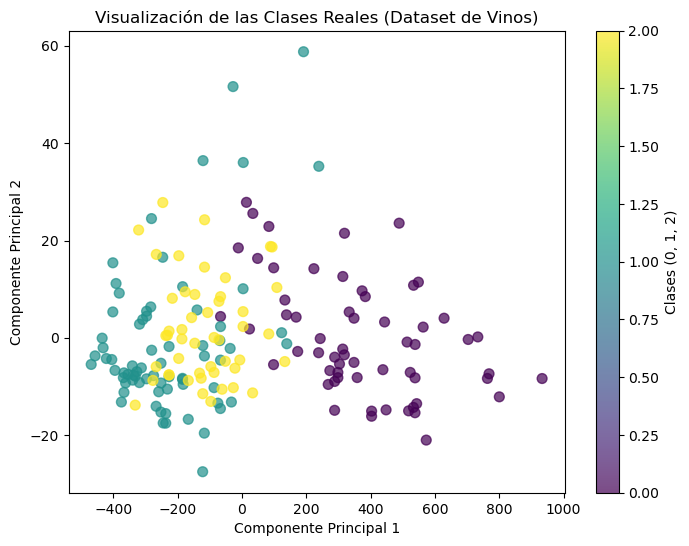

In [2]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

# Cargar el dataset de vinos
wine = load_wine()
X = wine.data  # Características químicas
y = wine.target  # Etiquetas reales (clases)

# Reducir la dimensionalidad a 2D para graficar
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Graficar las clases reales
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Clases (0, 1, 2)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de las Clases Reales (Dataset de Vinos)')
plt.show()


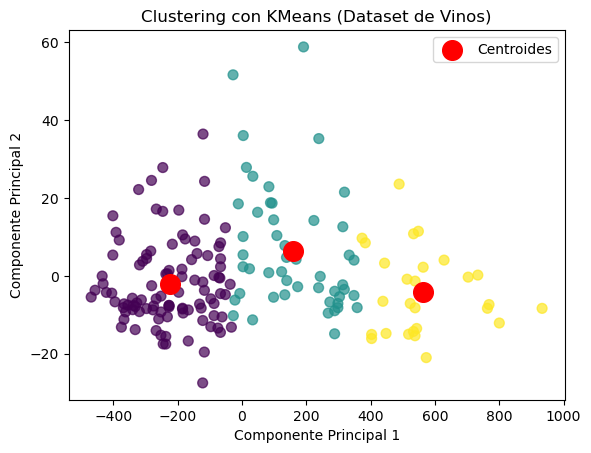

In [3]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

# Cargar el dataset de vinos
wine = load_wine()
X = wine.data  # Usamos las características químicas de los vinos
y = wine.target  # Etiquetas originales (las ignoraremos en KMeans)

# Crear y entrenar el modelo KMeans
# Seleccionamos 3 clusters porque sabemos que hay 3 clases de vinos
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Reducir la dimensionalidad a 2D para graficar (usamos PCA)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Graficar los clusters
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
centers = pca.transform(kmeans.cluster_centers_)  # Reducimos también los centroides
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering con KMeans (Dataset de Vinos)')
plt.legend()
plt.show()

